In [4]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib as plt

In [99]:
tips_df = sb.load_dataset('tips')

In [100]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
#dimension of data set
tips_df.shape

(244, 7)

In [102]:
set(tips_df['day'])

{'Fri', 'Sat', 'Sun', 'Thur'}

In [103]:
tips_df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [104]:
tips_df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [105]:
tips_df.groupby(['day', 'smoker', 'sex']).sum()

total_bill     tip  size
day  smoker sex                             
Thur Yes    Male        191.71   30.58    23
            Female      134.53   20.93    17
     No     Male        369.73   58.83    50
            Female      400.36   61.49    62
Fri  Yes    Male        163.62   21.93    17
            Female       88.58   18.78    14
     No     Male         34.95    5.00     4
            Female       38.73    6.25     5
Sat  Yes    Male        589.62   77.74    71
            Female      304.00   43.03    33
     No     Male        637.73  104.21    85
            Female      247.05   35.42    30
Sun  Yes    Male        392.12   52.82    39
            Female       66.16   14.00    10
     No     Male        877.34  133.96   124
            Female      291.54   46.61    43

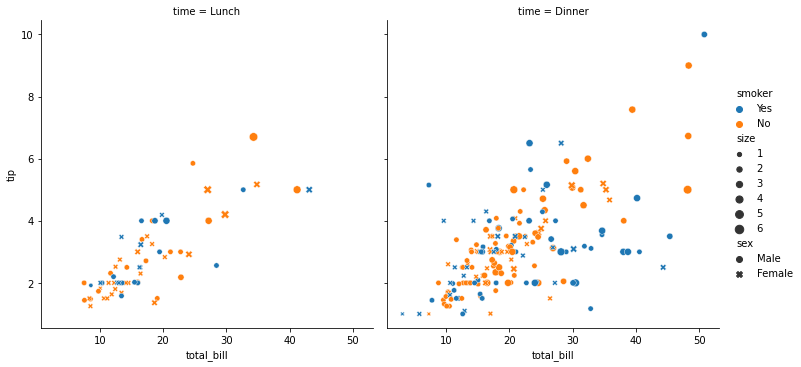

In [106]:
sb.relplot(
    data=tips_df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="sex", size="size",
)

<AxesSubplot:xlabel='day', ylabel='Count'>

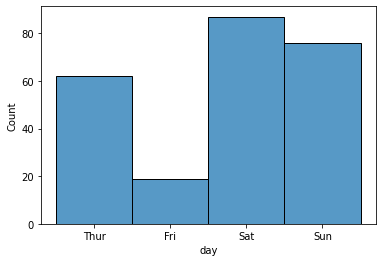

In [107]:
sb.histplot(data=tips_df,x='day')

<AxesSubplot:xlabel='size', ylabel='Count'>

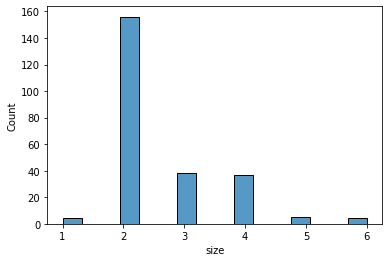

In [108]:
sb.histplot(tips_df, x='size')

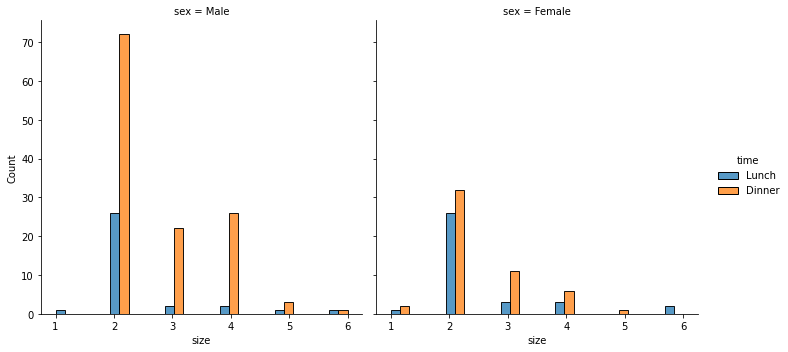

In [109]:
sb.displot(tips_df, x='size', hue='time',col='sex', multiple='dodge')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

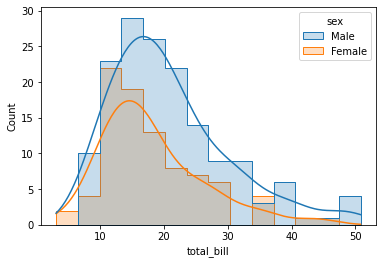

In [110]:
#kde represents the line of the histogram
sb.histplot(tips_df, x='total_bill', hue='sex', element='step', kde=True)

<AxesSubplot:xlabel='sex', ylabel='Count'>

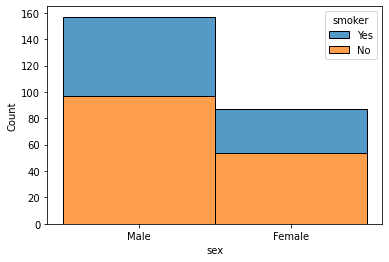

In [111]:
sb.histplot(tips_df, x='sex', hue='smoker', multiple='stack')

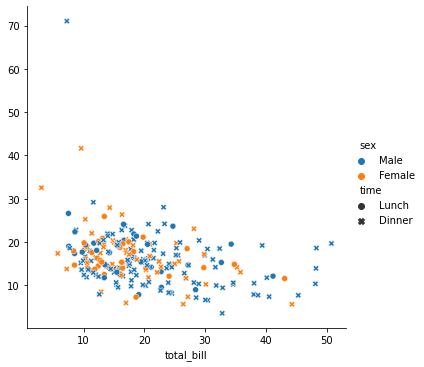

In [112]:
#total_bill, tip, sex
sb.relplot(data=tips_df,x='total_bill', 
           y=(tips_df.tip/tips_df.total_bill)*100 ,
           hue='sex', style='time')

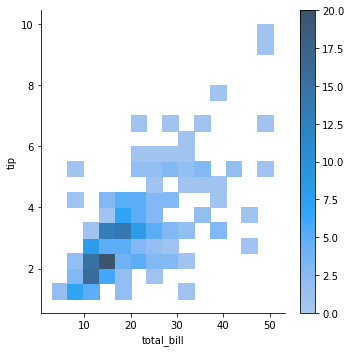

In [113]:
sb.displot(tips_df, x='total_bill', y='tip', cbar=True,)

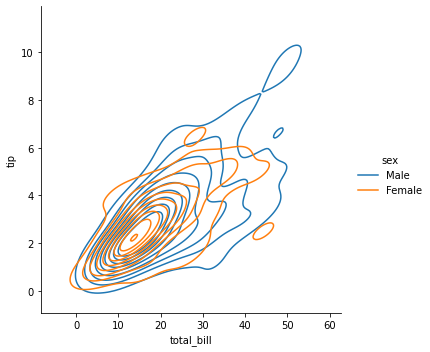

In [114]:
sb.displot(tips_df, x='total_bill', y='tip', kind='kde', hue='sex')

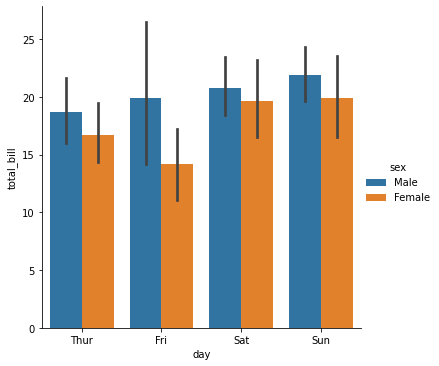

In [115]:
#day,sex,total bill
sb.catplot(data=tips_df, x='day', y='total_bill',hue='sex',kind='bar')

In [116]:
sample= tips_df.groupby(['sex', 'smoker']).count()
sample

total_bill  tip  day  time  size
sex    smoker                                  
Male   Yes             60   60   60    60    60
       No              97   97   97    97    97
Female Yes             33   33   33    33    33
       No              54   54   54    54    54

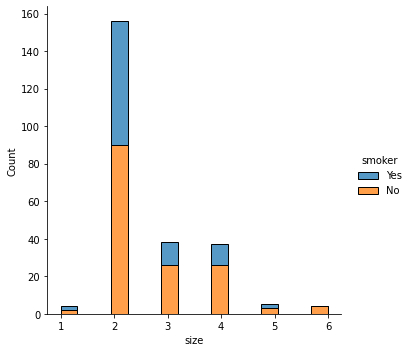

In [117]:
sb.displot(data=tips_df, x='size', hue='smoker', multiple='stack')

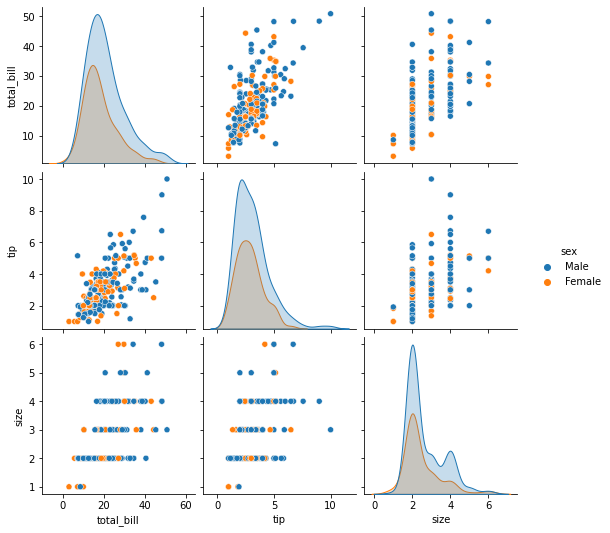

In [118]:
sb.pairplot(data=tips_df, hue='sex')

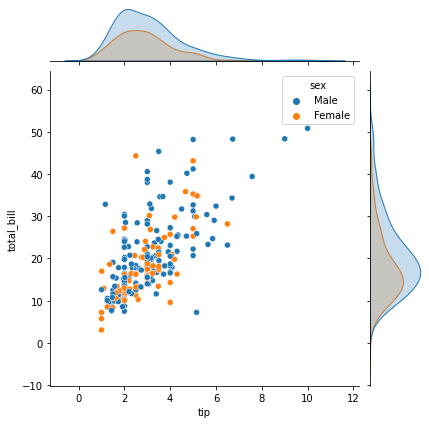

In [119]:
sb.jointplot(data=tips_df, x='tip', y='total_bill', hue='sex')

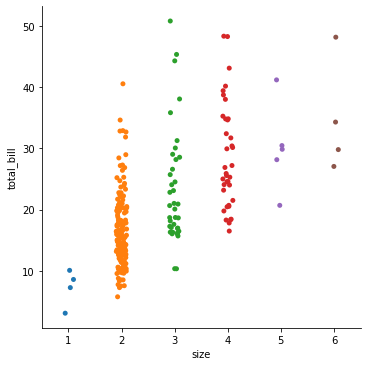

In [120]:
sb.catplot(x="size", y="total_bill", data=tips_df)

In [121]:
#lamda and map function
x=lambda a : a * a
print(x(5))

25


In [122]:
a=[5,5,8,45,8,658,41]
b=map(lambda x:x+20,a)
print(list(b))

[25, 25, 28, 65, 28, 678, 61]


In [123]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [124]:
tips_df['Tip_%']=(tips_df['tip']/tips_df['total_bill'])*100
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,Tip_%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [125]:
tips_df['bill_per_person']=tips_df.apply(lambda x:x['total_bill']/x['size'],axis=1)

In [126]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,Tip_%,bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,6.147500


In [127]:
def smoke(m):
    if(m=='Yes'):
        return 1
    else:
        return 0
tips_df['smoker']=tips_df['smoker'].apply(smoke)
tips_df.sample(10)

,total_bill,tip,sex,smoker,day,time,size,Tip_%,bill_per_person
32,15.06,3.00,Female,0,Sat,Dinner,2,19.920319,7.530000
147,11.87,1.63,Female,0,Thur,Lunch,2,13.732098,5.935000
240,27.18,2.00,Female,1,Sat,Dinner,2,7.358352,13.590000
154,19.77,2.00,Male,0,Sun,Dinner,4,10.116338,4.942500
141,34.30,6.70,Male,0,Thur,Lunch,6,19.533528,5.716667
39,31.27,5.00,Male,0,Sat,Dinner,3,15.989767,10.423333
237,32.83,1.17,Male,1,Sat,Dinner,2,3.563814,16.415000
92,5.75,1.00,Female,1,Fri,Dinner,2,17.391304,2.875000
126,8.52,1.48,Male,0,Thur,Lunch,2,17.370892,4.260000
83,32.68,5.00,Male,1,Thur,Lunch,2,15.299878,16.340000


In [128]:
tips_df.sample(20)

,total_bill,tip,sex,smoker,day,time,size,Tip_%,bill_per_person
28,21.70,4.30,Male,0,Sat,Dinner,2,19.815668,10.850000
151,13.13,2.00,Male,0,Sun,Dinner,2,15.232292,6.565000
35,24.06,3.60,Male,0,Sat,Dinner,3,14.962594,8.020000
41,17.46,2.54,Male,0,Sun,Dinner,2,14.547537,8.730000
161,12.66,2.50,Male,0,Sun,Dinner,2,19.747235,6.330000
138,16.00,2.00,Male,1,Thur,Lunch,2,12.500000,8.000000
164,17.51,3.00,Female,1,Sun,Dinner,2,17.133067,8.755000
140,17.47,3.50,Female,0,Thur,Lunch,2,20.034345,8.735000
210,30.06,2.00,Male,1,Sat,Dinner,3,6.653360,10.020000
217,11.59,1.50,Male,1,Sat,Dinner,2,12.942192,5.795000


In [129]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,Tip_%,bill_per_person
0,16.99,1.01,Female,0,Sun,Dinner,2,5.944673,8.495000
1,10.34,1.66,Male,0,Sun,Dinner,3,16.054159,3.446667
2,21.01,3.50,Male,0,Sun,Dinner,3,16.658734,7.003333
3,23.68,3.31,Male,0,Sun,Dinner,2,13.978041,11.840000
4,24.59,3.61,Female,0,Sun,Dinner,4,14.680765,6.147500


In [132]:
tips_df.groupby(['day','time']).sum().unstack()

total_bill              tip           size              Tip_%  \
time      Lunch   Dinner   Lunch  Dinner  Lunch Dinner       Lunch   
day                                                                  
Thur    1077.55    18.78  168.83    3.00  150.0    2.0  983.934490   
Fri       89.92   235.96   16.68   35.28   14.0   26.0  132.135422   
Sat         NaN  1778.40     NaN  260.40    NaN  219.0         NaN   
Sun         NaN  1627.16     NaN  247.39    NaN  216.0         NaN   

                  bill_per_person              
time       Dinner           Lunch      Dinner  
day                                            
Thur    15.974441      450.858833    9.390000  
Fri    190.699333       46.586667  107.937500  
Sat   1332.419933             NaN  712.289167  
Sun   1268.419376             NaN  597.665833

In [153]:
tips_df.pivot_table(index=['day','time'],values=['total_bill'],aggfunc=[np.sum,np.mean])

sum       mean
            total_bill total_bill
day  time                        
Thur Lunch     1077.55  17.664754
     Dinner      18.78  18.780000
Fri  Lunch       89.92  12.845714
     Dinner     235.96  19.663333
Sat  Dinner    1778.40  20.441379
Sun  Dinner    1627.16  21.410000